In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data_medicare = pd.read_excel('data/Medicare_Inpatient_2017.xlsx')
providers = pd.read_excel('data/Medicare_Inpatient_2017.xlsx',sheet_name=1)

In [4]:
data_medicare.head()

,DRG Definition,Provider Id,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,28,117117.78570,25823.714290,24057.392860
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,32,98357.56250,20688.343750,19791.406250
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,11,69153.54546,11811.181820,8194.363636
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,12,100427.33330,19134.000000,18154.000000
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,17,58199.47059,8519.470588,6714.882353


In [5]:
providers.head()

,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,AL - Dothan
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,AL - Montgomery


In [8]:
data = data_medicare.merge(right=providers,on='Provider Id')

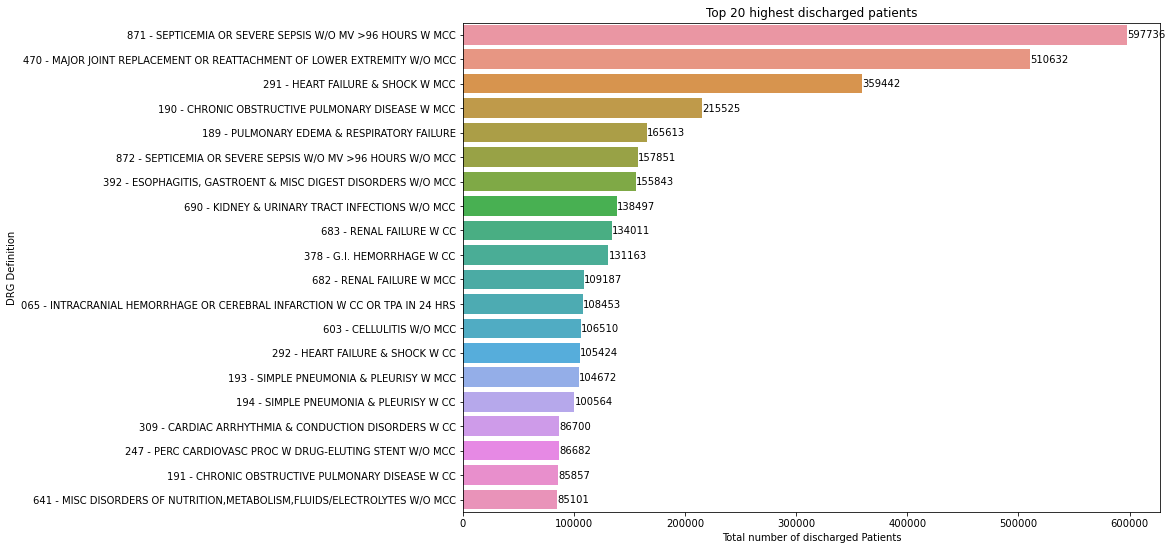

In [85]:
total_discharge = data.groupby('DRG Definition')['Total Discharges'].sum().sort_values(ascending=False)[:20]
fig = plt.figure(figsize=(12.5,9))
ax = sns.barplot(x=total_discharge.values,y=total_discharge.index,orient='h')
plt.title('Top 20 highest discharged patients')
plt.xlabel('Total number of discharged Patients')
ax.bar_label(ax.containers[0])
plt.show()

##### We can see that the people are suffered with `SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC` in highest number, very less people are suffered with `MYELOPROLIF DISORD OR POORLY DIFF NEOPL W MAJ O.R. PROC W/O CC/MCC' `  and `MENSTRUAL & OTHER FEMALE REPRODUCTIVE SYSTEM DISORDERS W CC/MCC ` patients are discharged in small number. 

In [86]:
data.head()

,DRG Definition,Provider Id,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,28,117117.78570,25823.714290,24057.392860,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,32,98357.56250,20688.343750,19791.406250,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,11,69153.54546,11811.181820,8194.363636,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,12,100427.33330,19134.000000,18154.000000,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,17,58199.47059,8519.470588,6714.882353,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan


In [88]:
data.groupby('Provider City')['DRG Definition'].sum()

Provider City
ABBEVILLE      193 - SIMPLE PNEUMONIA & PLEURISY W MCC194 - S...
ABERDEEN       064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...
ABILENE        025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...
ABINGDON       064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...
ABINGTON       003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...
                                     ...                        
ZACHARY        065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...
ZANESVILLE     038 - EXTRACRANIAL PROCEDURES W CC039 - EXTRAC...
ZEELAND        190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W ...
ZEPHYRHILLS    038 - EXTRACRANIAL PROCEDURES W CC039 - EXTRAC...
ZION           847 - CHEMOTHERAPY W/O ACUTE LEUKEMIA AS SECON...
Name: DRG Definition, Length: 1905, dtype: object